In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import imageio as img
from scipy.io import wavfile
import sounddevice as sd
from time import sleep

In [2]:

class Image:
    @staticmethod
    def open(path: str):
        pic = img.imread(path)
        return pic

    @staticmethod
    def convert_to_rgb(pic_sig: np.ndarray):
        red = pic_sig[:, :, 0]
        green = pic_sig[:, :, 1]
        blue = pic_sig[:, :, 2]
        return red, green, blue

    @staticmethod
    def show(im: np.ndarray, title="an image"):
        plt.imshow(im)
        plt.title(title)
        plt.show()
        
    @staticmethod
    def gray_show(gray: np.ndarray, title="an image"):
        plt.imshow(np.dstack([gray, gray, gray]))
        plt.title(title)
        plt.show()
        
    @staticmethod
    def rgb_show(r: np.ndarray, g: np.ndarray, b: np.ndarray, ):
        plt.imshow(np.dstack([r, g, b]))
        plt.show()


    @staticmethod
    def convolve(pic: np.ndarray, fil: np.ndarray):
        #return np.array(np.minimum(convolve(pic, fil), 255), dtype='uint8')

        return cv.filter2D(pic, -1, fil)
   

    @staticmethod
    def gray_scale(pic: np.ndarray):
        shape = np.shape(pic)
       
        grey = np.array([ [0 for i in range(shape[1])] for j in range(shape[0] )])

        for i in range(shape[0]):
            for j in range(shape[1]):
                grey[i][j] = pic[i][j][0] * 0.3 +  pic[i][j][1] * 0.59 + pic[i][j][2] * 0.11
        return grey.astype(np.uint8)

    


    @staticmethod
    def gausian_blur(pic, dim):
        if dim == 3:
            kernel = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
        elif dim == 5:
            kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6],  [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256
        return Image.convolve(pic, kernel)


    @staticmethod
    def horizontal_edge_detector(pic):
    
        kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        return Image.convolve(pic, kernel)

    @staticmethod
    def vertical_edge_detector(pic):
        
        kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        return Image.convolve(pic, kernel)
    
    @staticmethod
    def edge_detector_1(pic):
        
        kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
        return Image.convolve(pic, kernel)
    @staticmethod
    def edge_detector_2(pic):
        
        kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
        return Image.convolve(pic, kernel)

    def edge_detector_3(pic):
        return Image.horizontal_edge_detector(pic) + Image.vertical_edge_detector(pic)
        

    




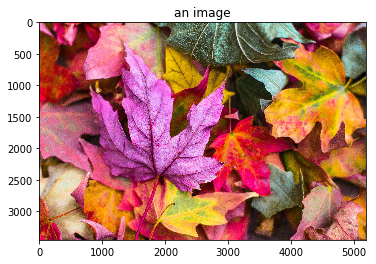

(3456, 5184, 3)

In [3]:
big_image = Image.open("./pic.jpg")
Image.show(big_image)
   
big_image.shape 
### both width and height of the image is divideble by 4, so no change needed

    

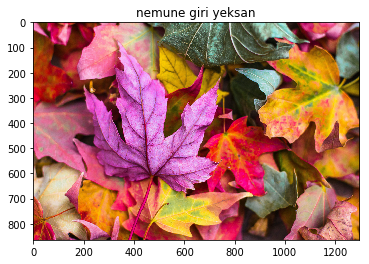

In [5]:
###nemune giri yeksan

shapes = big_image.shape
new_width = int(shapes[1]/4)
new_height = int(shapes[0]/4)
#yeksan = np.copy(big_image)[0: new_height, 0: new_width]
yeksan = np.zeros((new_height, new_width, 3))

#for i in range(new_height):
#    for j in range(new_width):
        #print(big_image[i][j][0])



for ch in range(3):
    for h in range(new_height):
        for w in range(new_width):
        
            #print(np.mean(big_image[ h*4: (h + 1)* 4, w*4: (w+1)*4 , ch]))
            yeksan[h][w][ch] = np.mean(big_image[h*4: (h+1)*4 , w*4: (w + 1)* 4, ch])/255
        
Image.show(yeksan, "nemune giri yeksan")





In [125]:
print(np.min(yeksan))
print(np.max(yeksan))
print(yeksan[800, 1200])

0.0
255.0
[236. 134. 133.]


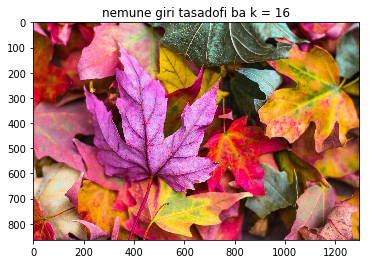

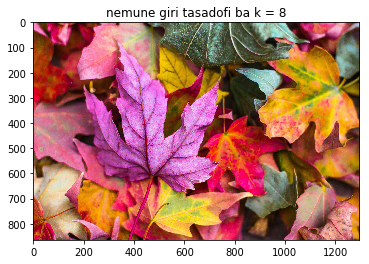

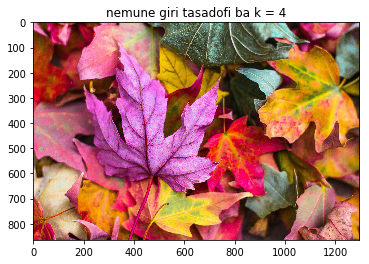

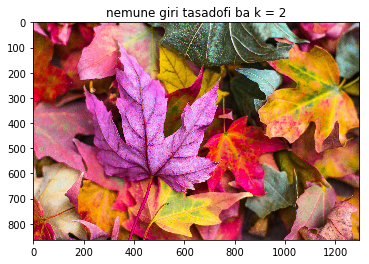

In [129]:
#nemune giri tasadofi

shapes = big_image.shape
new_width = int(shapes[1]/4)
new_height = int(shapes[0]/4)

def select_randomly(partition, k):

    pixels = [np.random.randint(0, 15) for i in range(k)]

    numbers = [partition[i//4][i - (i//4) * 4] for i in pixels]

    return np.mean(numbers)/255

for k in [16, 8, 4, 2]:
    
    tasadofi = np.zeros((new_height, new_width, 3))
    
    for ch in range(3):
        for h in range(new_height):
            for w in range(new_width):
            
                tasadofi[h][w][ch] = select_randomly(big_image[ h*4: (h + 1)* 4, w*4: (w+1)*4 , ch], k)
                
    Image.show(tasadofi, "nemune giri tasadofi ba k = " + str(k))






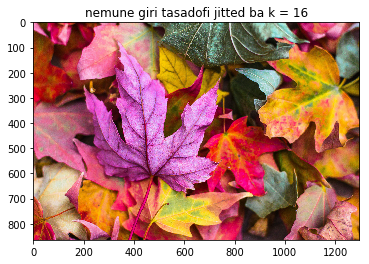

In [9]:
#jittered
shapes = big_image.shape
new_width = int(shapes[1]/4)
new_height = int(shapes[0]/4)


def select_2_by_2s(partition, k):
    numbers = []
    for i in range(partition.shape[0]//2):
        for j in range(partition.shape[1]//2):
            numbers.append(select_randomly(partition[i: i + 2, j : j+2], k))
    return np.mean(numbers)

def select_randomly(partition, k):
    
    pixel = np.random.randint(0, 4)
    number = partition[pixel//2][pixel - (pixel//2) * 2] 
    return number/255

for k in [16]:
    
    tasadofi = np.zeros((new_height, new_width, 3))
    
    for ch in range(3):
        for h in range(new_height):
            for w in range(new_width):
            
                tasadofi[h][w][ch] = select_2_by_2s(big_image[ h*4: (h + 1)* 4, w*4: (w+1)*4 , ch], k)
                
    Image.show(tasadofi, "nemune giri tasadofi jitted ba k = " + str(k))

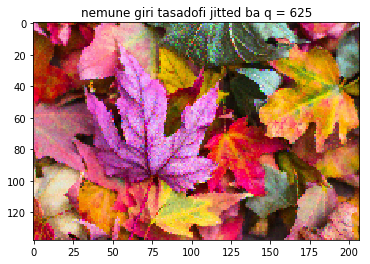

In [29]:
#jittered

    
def divide_to_k_parts(partition, k):
    numbers = []
    
    for i in range(partition.shape[0]//k):
        for j in range(partition.shape[1]//k):
            
            numbers.append(select_randomly(partition[i: i + k, j : j+k]))
   
    return np.mean(numbers)

def select_randomly(partition):
    
    pixel = np.random.randint(0, len(partition[0]) * len(partition))
    number = partition[pixel//len(partition)][pixel - (pixel//len(partition)) * len(partition[0])] 
    return number/255

def reduce_quality(pic, k, q):
    shapes = pic.shape
    dim = int(np.sqrt(q))
    new_width = int(shapes[1]//dim)
    new_height = int(shapes[0]//dim)
    
    
    tasadofi = np.zeros((new_height, new_width, 3))

    for ch in range(3):
        for h in range(new_height):
            for w in range(new_width):

                tasadofi[h][w][ch] = divide_to_k_parts(big_image[ h*dim: (h + 1)* dim, w*dim: (w+1)*dim , ch], k)
                
    
    
    return tasadofi
q = 625
k = 25
reduced = reduce_quality(big_image, k, q)
Image.show(reduced, "nemune giri tasadofi jitted ba q = " + str(q))

In [3]:

class Sound:
    SampleRate = 0

    @staticmethod
    def open(path: str):
        """
        :param path: path to the target wave file
        :return: audio signal in np.ndarray form
        """
        Sound.SampleRate, sig = wavfile.read(path)

        return sig

    @staticmethod
    def draw(sig: np.ndarray, length: float, sig2: np.ndarray = None):
        """
        :param sig: the target signal to be drawn
        :param length: the length of the signal you want to be plotted
        :param sig2: [optional] second target signal to be drawn
        :return: None
        """
        length = int(length * Sound.SampleRate)
        length = min(len(sig), length) if sig2 is None else min(len(sig), len(sig2), length)
        if sig2 is not None:
            plt.subplot(2, 1, 1)
            plt.plot(sig2[:length])
            plt.subplot(2, 1, 2)
        else:
            plt.subplot(1, 1, 1)
        plt.plot(sig[:length])
        plt.show()

    @staticmethod
    def play(sig: np.ndarray):
        sd.play(sig, Sound.SampleRate)
        sleep(len(sig) / Sound.SampleRate)
        

song = Sound.open("./1.wav")[:, 0]
print(len(song))





    

26357


In [15]:
def fm_demod(x, df=1.0, fc=0.0):
    ''' Perform FM demodulation of complex carrier.

    Args:
        x (array):  FM modulated complex carrier.
        df (float): Normalized frequency deviation [Hz/V].
        fc (float): Normalized carrier frequency.

    Returns:
        Array of real modulating signal.
    '''
    
    # Remove carrier.
    n = np.arange(len(x))
    rx = x*np.exp(-1j*2*np.pi*fc*n)

    # Extract phase of carrier.
    phi = np.arctan2(np.imag(rx), np.real(rx))

    # Calculate frequency from phase.
    y = np.diff(np.unwrap(phi)/(2*np.pi*df))

    return y



1.0
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 5.97596372e-01
 5.97619048e-01 5.97641723e-01]


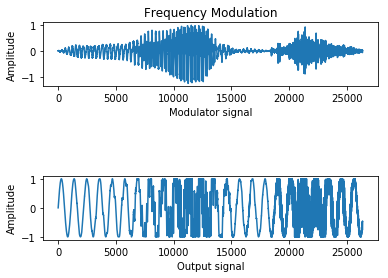

40 fc
here


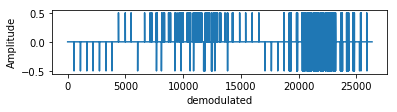

0.49999999999957323
[ 1.55926873e-15  1.55926873e-15  1.06061798e-14 ...  6.52748966e-11
 -8.29487590e-11  6.52740084e-11]


In [16]:
def sender(x, fc, df):
    
    
    
    time = np.arange(len(song)) / 44100.0
    print(time)
    product = [0 for i in range(len(song))]


    vmo = max(np.abs(x))

    for i, t in enumerate(time):
        #(df/vmo)
        
        product[i] = np.sin(2. * np.pi * t * fc  + 2. * t  * np.pi * df * x[i])
    
    return product

rescaled = song/np.abs(np.max(song))


print(np.max(rescaled))
def reciever(modulated, fc):
    
    demodulated = np.fft.fft(modulated)
    #size = demodulated.size
    #freq = np.fft.fftfreq(size, d=1/44100)
    #plt.plot(freq)
    #plt.show()
    demodulated = np.fft.fftshift(demodulated)
    a = 10000
    demodulated[:a] = [0 for i in range(a)]
    demodulated[len(demodulated) - a : ] = [0 for i in range(a)]
    #print(demodulated)
    demodulated = demodulated - fc
    #print(demodulated)
    return (demodulated / df)



fc = 40
df = 1
product = sender(rescaled, fc, df)

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(rescaled)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')

plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

#demodulated = reciever(product, fc)
demodulated = fm_demod(product,df, fc)
plt.subplot(3, 1, 2)

plt.plot(demodulated)
plt.ylabel('Amplitude')
plt.xlabel('demodulated')
plt.show()

print(max(np.abs(demodulated)))


Sound.play(demodulated)
print(demodulated)